<a href="https://colab.research.google.com/github/gonulsinem/1_Python_ML/blob/main/7_R_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


BTK Akademi- Python ile Makine Öğrenmesi Kursu calismalari ve kendi tuttuğum 

*   Liste öğesi
*   Liste öğesi

notlardan olusmaktadir.

Kursta verilen maaslar.csv veri seti kullanildi
BTK Akademi- Python ile Makine Öğrenmesi Kursu calismalari ve kendi tuttuğum

Liste öğesi
Liste öğesi
notlardan olusmaktadir.

Kursta verilen maaslar.csv veri seti kullanildi

## R-Square

1.   Hata Kareleri toplamı
2.   Ortalama Farkların toplamı
3.   0-> en kötü algoritmanın cikardigi durum, 2-> en iyi algortmanin cikardigi durum
4.   R Square 0-1 arasinda olabilir
5.   Tahmin algoritmasinin basarisini olcebilecegimiz sayisal bir deger verir.

## Duzeltilmis R-Square yontemi- (Adjusted R-Square)



*   R-Square ne kadar butukse tahmin o kadar dogrudur. 
*   R-Square modelin ne kadaar gelistigini gormemizi engelleyebilir.
*   Eklenen yeni degisken R-Square degerini azaltmaz.
*   Degiskenlerin sisteme etkisini ogrenip ondan sonra degiskeni almaliyiz.
*   Olumlu etkisi varsa hata azalir, R-Square degeri artar.
*   Kac eleman, kac deger 



> Gercek ve tahmin degerleri






In [2]:
#kutuphanaler import edildi.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/maaslar.csv')
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [7]:
x = data.iloc[:,1:2]
X = x.values
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [8]:
y = data.iloc[:,-1:]
Y = y.values
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


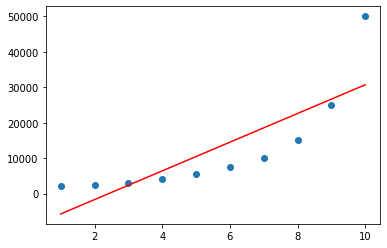

In [9]:
#Lineer Regresyon
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y)
plt.plot(X, lin_reg.predict(X), color = 'red')

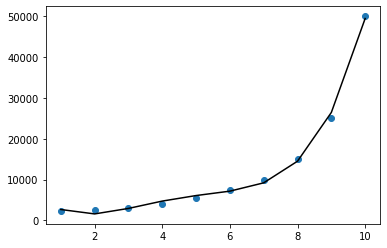

In [12]:
# Polinomal Regresyon
from sklearn.preprocessing import PolynomialFeatures

pol_reg = PolynomialFeatures(degree = 4)

x_pol = pol_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_pol, Y)

plt.scatter(X, Y)
plt.plot(X, lin_reg2.predict(x_pol), color = 'black')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


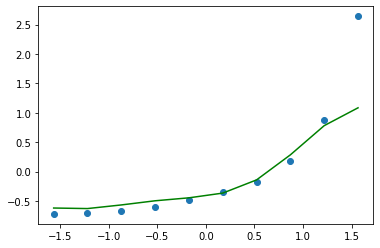

In [13]:
#SVR

from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_scaler = sc1.fit_transform(X)

sc2 = StandardScaler()
y_scaler = sc2.fit_transform(Y)

from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_scaler, y_scaler)

plt.scatter(x_scaler, y_scaler)
plt.plot(x_scaler, svr_reg.predict(x_scaler), color = 'green')

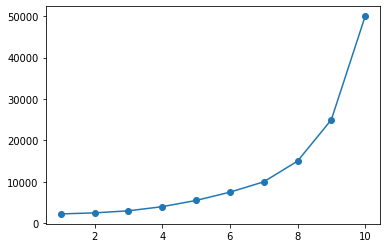

In [15]:
# Decision Tree 

from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state =0)
dt_reg.fit(X,Y)

plt.scatter(X,Y)
plt.plot(X, dt_reg.predict(X))

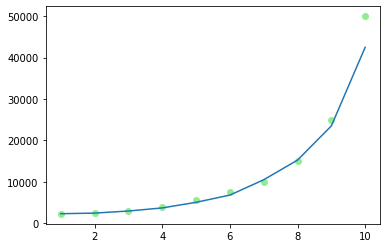

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
rf_reg.fit(X, Y.ravel())

plt.scatter(X,Y, color='lightgreen')
plt.plot(X, rf_reg.predict(X))

In [18]:
from sklearn.metrics import r2_score

In [19]:
print('Lineer R-Square')
print(r2_score(Y, lin_reg.predict(X)))

Lineer R-Square
0.6690412331929894


In [20]:
print('Polynomial Reg R-Square')
print(r2_score(Y, lin_reg2.predict(pol_reg.fit_transform(X))))

Polynomial Reg R-Square
0.9973922891706614


In [21]:
print('SVR R-Square')
print(r2_score(y_scaler, svr_reg.predict(x_scaler)))

SVR R-Square
0.7513836788854973


In [22]:
print('Decision Tree R-Square')
print(r2_score(Y, dt_reg.predict(X)))

Decision Tree R-Square
1.0


In [23]:
print('Random Forest R-Square')
print(r2_score(Y, dt_reg.predict(X)))

Random Forest R-Square
1.0
